# Домашнее задание по курсу "Машинное обучение и искусственный интеллект"
### От студента группы 617 Киназаров Темирбек 

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.listdir()

['.ipynb_checkpoints', 'MY2022 Fuel Consumption Ratings.csv', 'Untitled.ipynb']

In [3]:
data = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

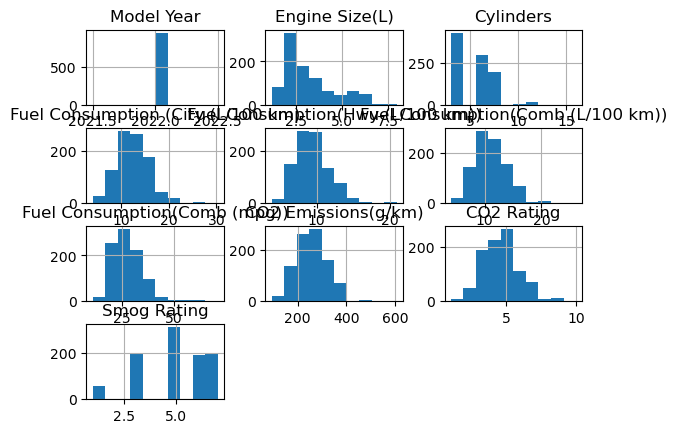

In [4]:
data.hist()

plt.show()

In [5]:
for value in data['Fuel Type'].unique():
    print(value, len(data[data['Fuel Type'] == value])/len(data))

Z 0.48414376321353064
X 0.4714587737843552
D 0.02959830866807611
E 0.014799154334038054


# 1. Для начала построим бинарную классификацию на срезе данных, содержащих Z, X, так как их количество примерно одинаково.

In [7]:
bin_class_data = data[data['Fuel Type'].isin(('X','Z'))][list((data.dtypes != 'object').keys()[(data.dtypes != 'object')]) + ['Fuel Type']]

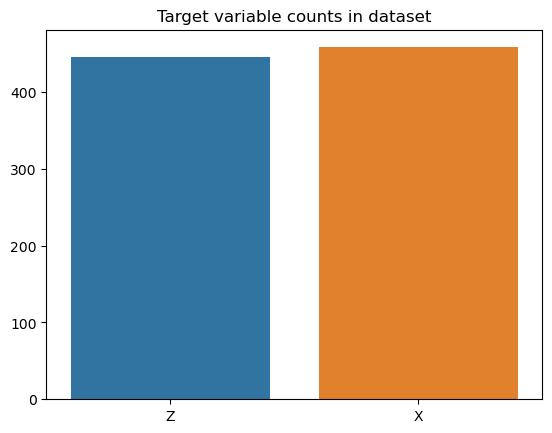

In [8]:
import seaborn as sns
import numpy as np
(unique, counts) = np.unique(bin_class_data['Fuel Type'], return_counts=True)
sns.barplot(x=bin_class_data['Fuel Type'].unique(), y=counts)
plt.title('Target variable counts in dataset')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardizer = StandardScaler()
X = standardizer.fit_transform(bin_class_data.loc[:, bin_class_data.columns != 'Fuel Type'])
X_train, X_test, y_train, y_test = train_test_split(X, (bin_class_data['Fuel Type'] == 'X')*1, test_size=0.25, random_state=0)


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
predictions = model.predict(X_test)


In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  82
False Positive(FP) =  21
True Negative(TN)  =  78
False Negative(FN) =  45
Accuracy of the binary classification = 0.708


Попробуем другие классификаторы
====

In [13]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [15]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.707965,0.645669,0.796117
Support Vector Machines,0.743363,0.700787,0.816514
Decision Trees,0.853982,0.842520,0.891667
Random Forest,0.876106,0.858268,0.915966
Naive Bayes,0.615044,0.574803,0.688679
K-Nearest Neighbor,0.783186,0.748031,0.848214


Лучший результат для этих данных получился на случайных деревьях

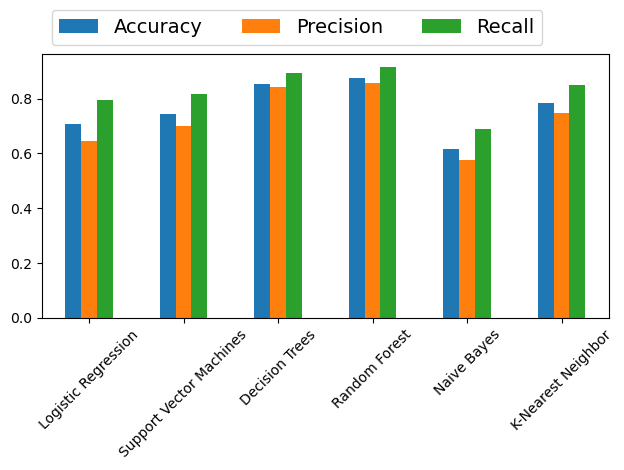

In [16]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()
plt.show()

# 2. Попробуем Multiclass классификатор на одном из столбцов

In [17]:
data = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

for value in data['Vehicle Class'].unique():
    print(value, len(data[data['Vehicle Class'] == value])/len(data))

Compact 0.07293868921775898
SUV: Small 0.20824524312896406
Mid-size 0.12367864693446089
Minicompact 0.0507399577167019
SUV: Standard 0.14904862579281183
Two-seater 0.05391120507399577
Subcompact 0.08456659619450317
Station wagon: Small 0.0200845665961945
Station wagon: Mid-size 0.008456659619450317
Full-size 0.06765327695560254
Pickup truck: Small 0.021141649048625793
Pickup truck: Standard 0.11945031712473574
Minivan 0.007399577167019027
Special purpose vehicle 0.012684989429175475


In [19]:
values_num = data['Vehicle Class'].unique()
data['Vehicle Class']=data['Vehicle Class'].replace(dict(zip(values_num, range(len(values_num)))))

In [20]:
data_multiclass = data[list((data.dtypes != 'object').keys()[(data.dtypes != 'object')])]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_multiclass.loc[:, data_multiclass.columns != 'Vehicle Class'], data_multiclass['Vehicle Class'], random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [23]:
print('Дерево решения score', sum(y_test == dtree_predictions)/len(y_test))

Дерево решения score 0.27848101265822783


In [24]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)

In [25]:
print('SVM score:', accuracy)

SVM score: 0.3924050632911392


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print('KNN score:', accuracy)

KNN score: 0.3080168776371308


In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

accuracy = gnb.score(X_test, y_test)
print('Наивный байесовский классификатор', accuracy)

Наивный байесовский классификатор 0.14767932489451477


### Ни один из выбранных классификаторов не сработал достаточно хорошо. Видмио зависимость этого столбца не самая большая от выбранных числовых параметров.


# 3. Таким же образом построим регрессию на каком-нибудь столбце. Но для начала посмотрим на матрицу корреляций

In [28]:
data = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')
df = data[(data.dtypes != 'object').keys()[(data.dtypes != 'object')]]

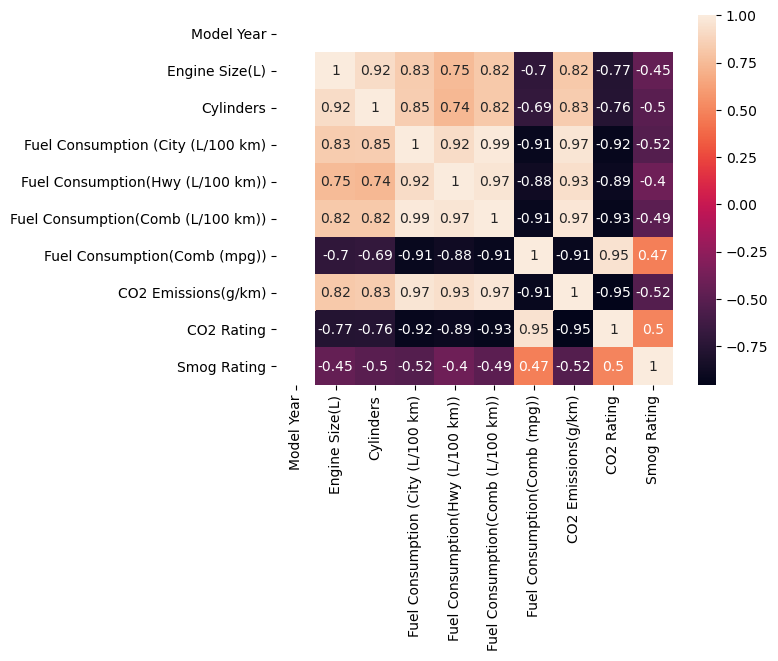

In [29]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Похоже, что CO2 Rating или Fuel Consumption(Comb (mpg)) отлично подойдут для построения на них регрессии

In [30]:
# df.columns

In [31]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'CO2 Rating'], df['CO2 Rating'], random_state = 0)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
print('Линейная регрессия (Коэффициент детерминации):', r_sq)

Линейная регрессия (Коэффициент детерминации): 0.9548321171056575


In [33]:
from sklearn.preprocessing import PolynomialFeatures
X = df.loc[:, df.columns != 'CO2 Rating']
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X_train)
transformer.fit(X_test)
X_train_ = transformer.transform(X_train)
X_test_ = transformer.transform(X_test)

In [34]:
model = LinearRegression().fit(X_train_, y_train)
r_sq = model.score(X_test_, y_test)
print('Полиномиальная регрессия (Коэффициент детерминации): ', r_sq)

Полиномиальная регрессия (Коэффициент детерминации):  0.9554880022537657


In [35]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [36]:
from sklearn.metrics import r2_score
y_1 = regr_1.predict(X_test)
print('Дерево решений (Коэффициент детерминации): ', r2_score(y_1, y_test))

Дерево решений (Коэффициент детерминации):  0.8881576441814827


## Из всех моделей лучше сработало полиномиальная регрессия, но не на много хуже  результат у линейной регрессии. Возможно, лучшим выбором будет за линейную модель